In [30]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random




In [31]:
all_genes = pd.read_csv('extracted_data/GxG_filled.csv', sep = ',', index_col = 0)
all_genes

ExE = pd.read_csv('extracted_data/ExE_imputed.csv', sep = ',', index_col = 0)
NxN = pd.read_csv('extracted_data/NxN_imputed.csv', sep = ',', index_col = 0)

R2:  -0.710836770645616
RMSE: 0.1711386886319378


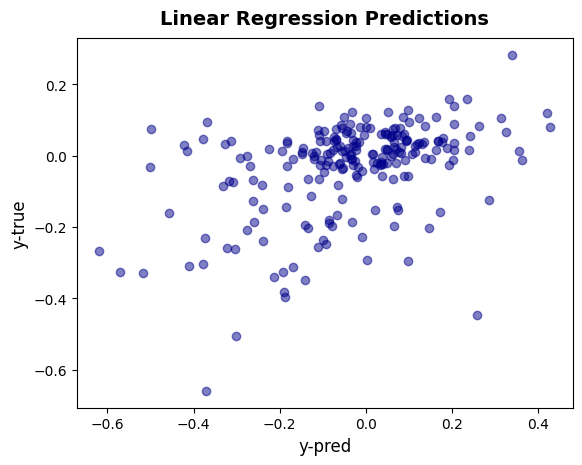

In [32]:
target_column = random.choice(ExE.columns)  # Randomly pick a column name

X = ExE.drop(columns=[target_column])  # Features (all columns except the target)
y = ExE[target_column]  # Target variable (the randomly selected column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9010960923703073


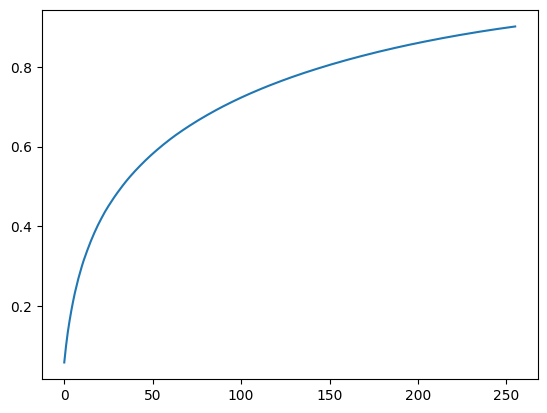

In [33]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [34]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.106220,-0.104242,0.388658,-0.581785,0.184288,0.266290,0.002655,0.257561,0.291762,-0.027040,...,0.027392,-0.091352,-0.021431,-0.046843,0.009566,0.006015,0.092538,-0.008345,0.015649,0.010656
1,0.218628,-0.142055,0.502684,-0.563677,0.183373,0.434839,0.115690,0.382275,0.378575,0.006893,...,0.051869,0.012298,0.022692,-0.112363,0.047449,0.027093,0.039056,0.039812,0.023495,-0.013365
2,0.964641,-0.508631,-0.079640,-0.093952,0.334735,-0.022249,-0.155689,0.045739,0.253026,0.052982,...,-0.023954,-0.024270,-0.016182,-0.047619,0.013460,-0.078515,-0.034792,-0.003126,-0.055339,-0.044612
3,-0.181221,-0.574374,0.504514,-1.104270,0.438245,0.269831,-0.159041,-0.468101,0.598684,0.041140,...,0.077434,-0.004186,-0.044952,0.021336,-0.036039,0.037680,-0.053631,-0.055264,0.026095,-0.006806
4,0.034505,0.038848,0.183718,-0.181252,0.405995,0.215025,0.042455,0.147520,0.331404,-0.031498,...,0.024187,-0.031680,0.042476,0.023498,0.042594,-0.063993,0.041665,-0.015790,-0.057186,-0.002091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0.272194,-0.404540,0.827239,-0.644806,0.071465,0.014436,-0.222727,-0.578233,0.127094,0.665757,...,-0.119996,0.065112,0.018329,0.021659,-0.113765,-0.027197,0.024062,0.032847,-0.051039,-0.031731
1104,0.322238,-0.073175,0.151653,0.016969,0.245666,0.059447,-0.105479,0.206178,-0.056838,0.147148,...,0.072146,-0.129796,0.002770,0.117485,0.071973,0.077806,-0.028394,0.052794,0.073107,-0.005184
1105,0.399807,-0.278605,0.572258,-0.007871,0.466709,-0.300941,-0.038144,0.210330,-0.465280,0.054291,...,0.066501,-0.007433,-0.010220,-0.140593,0.056486,0.119764,0.049363,0.026552,-0.009820,0.020530
1106,0.496639,-0.268969,0.666976,-0.095319,0.485196,-0.356060,-0.212894,0.424572,-0.058674,0.174619,...,0.010632,-0.052249,-0.101511,-0.084729,-0.101365,-0.087013,-0.100529,0.033152,-0.115170,0.061812


R2:  0.35582813932502966
RMSE: 0.10501341618473373


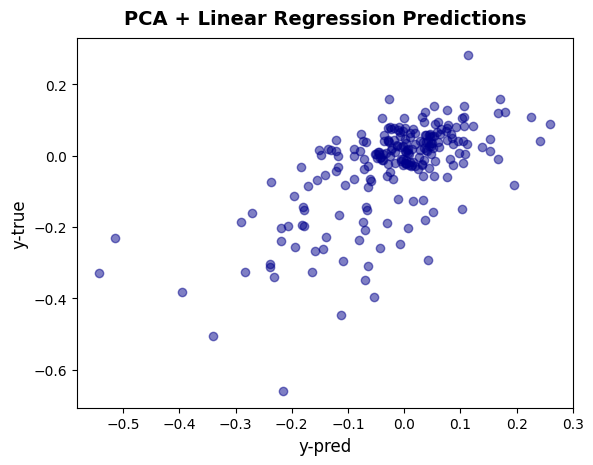

In [35]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2:  0.35791951889125495
RMSE: 0.10484280840592906


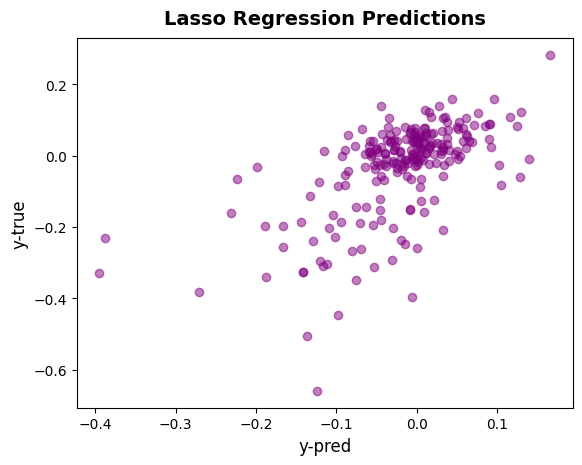

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.0004)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


print('R2: ', lasso.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='purple')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Lasso Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.32198230428967733
RMSE: 0.10773688789018003


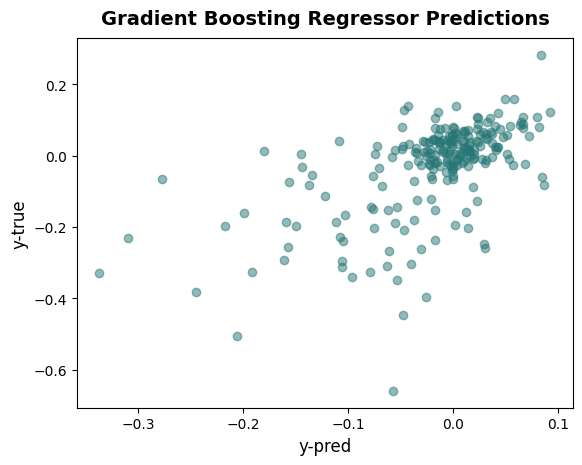

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='#267675')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Gradient Boosting Regressor Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.2477624111668688
RMSE: 0.1134805488035582


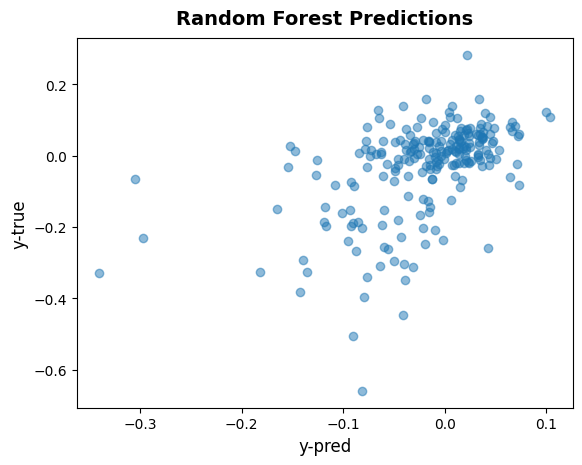

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Random Forest Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

In [41]:
# Use Basic Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

ModuleNotFoundError: No module named 'tensorflow'